In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import os

mywd = 'C:\\Users\\paula\\Desktop\\UNIL\\Statistics and Data Science\\GH3\\Notebooks\\Week_05'
os.chdir(mywd)
os.getcwd()

In [ ]:
pwd

In [ ]:
# Import dataset on Global Preference Survey from local folder
df_gps = pd.read_stata("data/global_preference_survey.dta")

In [ ]:
df_gps.head(7)

In [ ]:
df_gps.dtypes

In [ ]:
df_gps.describe()

In [ ]:
df_gps.boxplot(column =['patience', 'risktaking', 'posrecip', 'negrecip', 'altruism'], grid = False)

In [ ]:
import matplotlib.pyplot as plt #plt is pyplot

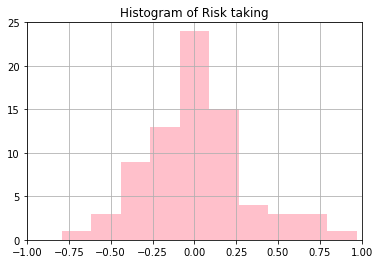

In [18]:
plt.hist(df_gps.loc[:,"risktaking"],       # risktaking column as argument
         color = "pink")                      # color in green
plt.title('Histogram of Risk taking')      # Title your figure!
plt.xlim(-1, 1)       # Specify x-axis range
plt.ylim(0, 25)       # Specify y-axis range
plt.grid(True)        # Add grid
plt.show()            # Display graph

In [19]:
altruism_mean = df_gps['altruism'].mean()

df_gps.loc[df_gps['altruism'] < altruism_mean, 'Cluster'] = 0
df_gps.loc[df_gps['altruism'] >= altruism_mean, 'Cluster'] = 1

df_gps.head(9)

,iso3,patience,risktaking,posrecip,negrecip,altruism,trust,Cluster
0,AFG,-0.201360,0.120764,0.289641,0.254712,0.166455,0.315964,1.0
1,DZA,0.059815,0.391530,-0.598255,0.254901,-0.009968,-0.177371,1.0
2,ARG,-0.229308,0.041503,0.159679,-0.140457,0.027347,-0.206733,1.0
3,AUS,0.657004,0.137137,0.069660,0.022190,0.155331,0.298973,1.0
4,AUT,0.608285,-0.061829,0.161047,-0.055415,-0.035363,0.154628,1.0
5,BGD,0.081137,-0.198068,0.154368,0.113288,0.906463,-0.173365,1.0
6,BOL,0.071331,0.103038,0.107920,-0.003735,-0.005187,-0.160330,1.0
7,BIH,-0.247258,-0.125639,0.096463,0.429355,-0.115310,-0.193106,0.0
8,BWA,0.233990,0.697379,-0.258667,-0.172722,-0.142062,-0.338462,0.0


In [20]:
df_gps.groupby('Cluster').count()

,iso3,patience,risktaking,posrecip,negrecip,altruism,trust
Cluster,,,,,,,
0.0,43,43,43,43,43,43,43
1.0,33,33,33,33,33,33,33


In [21]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [ ]:
# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [ ]:
fig_box = px.box(df_gps,                                           # Specify data frame
                 y=["posrecip", "negrecip"],                       # Select posrecip and negrecip variables
                 points="all",                                     # Include all observations as data points
                 color = "Cluster",                                # Color (and group by) column "Cluster"
                 labels = {"Cluster": "Altruism"},                 # Rename "Cluster" as "Altruism" in our legend
                 title = """Positive and negative reciprocity for highly- and lowly-altruistic countries 
                 <br>(Highly-altrustic: 1.0; Lowly-altruistic: 0.0)""")       # Always add a title!
fig_box.update_layout(autosize=False, width = 800)                # Specify width (by default, full notebook cell)
fig_box